In [1]:
import numpy as np
import torch

需要求导的，可以通过手动定义

In [2]:
#方法1
x = torch.randn(3,4, requires_grad = True)
x

tensor([[ 0.0948, -1.4342, -0.7291, -0.4242],
        [ 0.4200,  0.0515,  0.8513,  0.1307],
        [-0.1850, -0.5484,  1.0097,  1.3059]], requires_grad=True)

In [3]:
#方法2
x = torch.randn(3,4)
x.requires_grad = True
x

tensor([[-0.5269, -1.3138,  0.2037,  0.0510],
        [-1.9314,  0.2840,  0.2114,  0.4385],
        [-0.4734,  0.7065,  0.0798, -2.4329]], requires_grad=True)

In [13]:
b = torch.randn(3,4, requires_grad = True)

In [14]:
t = x + 2 * b
t

tensor([[-1.4541,  0.6454, -0.0657,  0.7530],
        [-0.4034,  0.1791, -0.7797,  0.7884],
        [-0.5243, -1.2428, -2.8496, -5.4659]], grad_fn=<AddBackward0>)

In [15]:
y = t.sum()
y

tensor(-10.4196, grad_fn=<SumBackward0>)

In [16]:
y.backward()

In [17]:
b.grad

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

虽然没有指定t的requires_grad 但是需要用到它，也会默认的

In [18]:
x.requires_grad, b.requires_grad, t.requires_grad

(True, True, True)

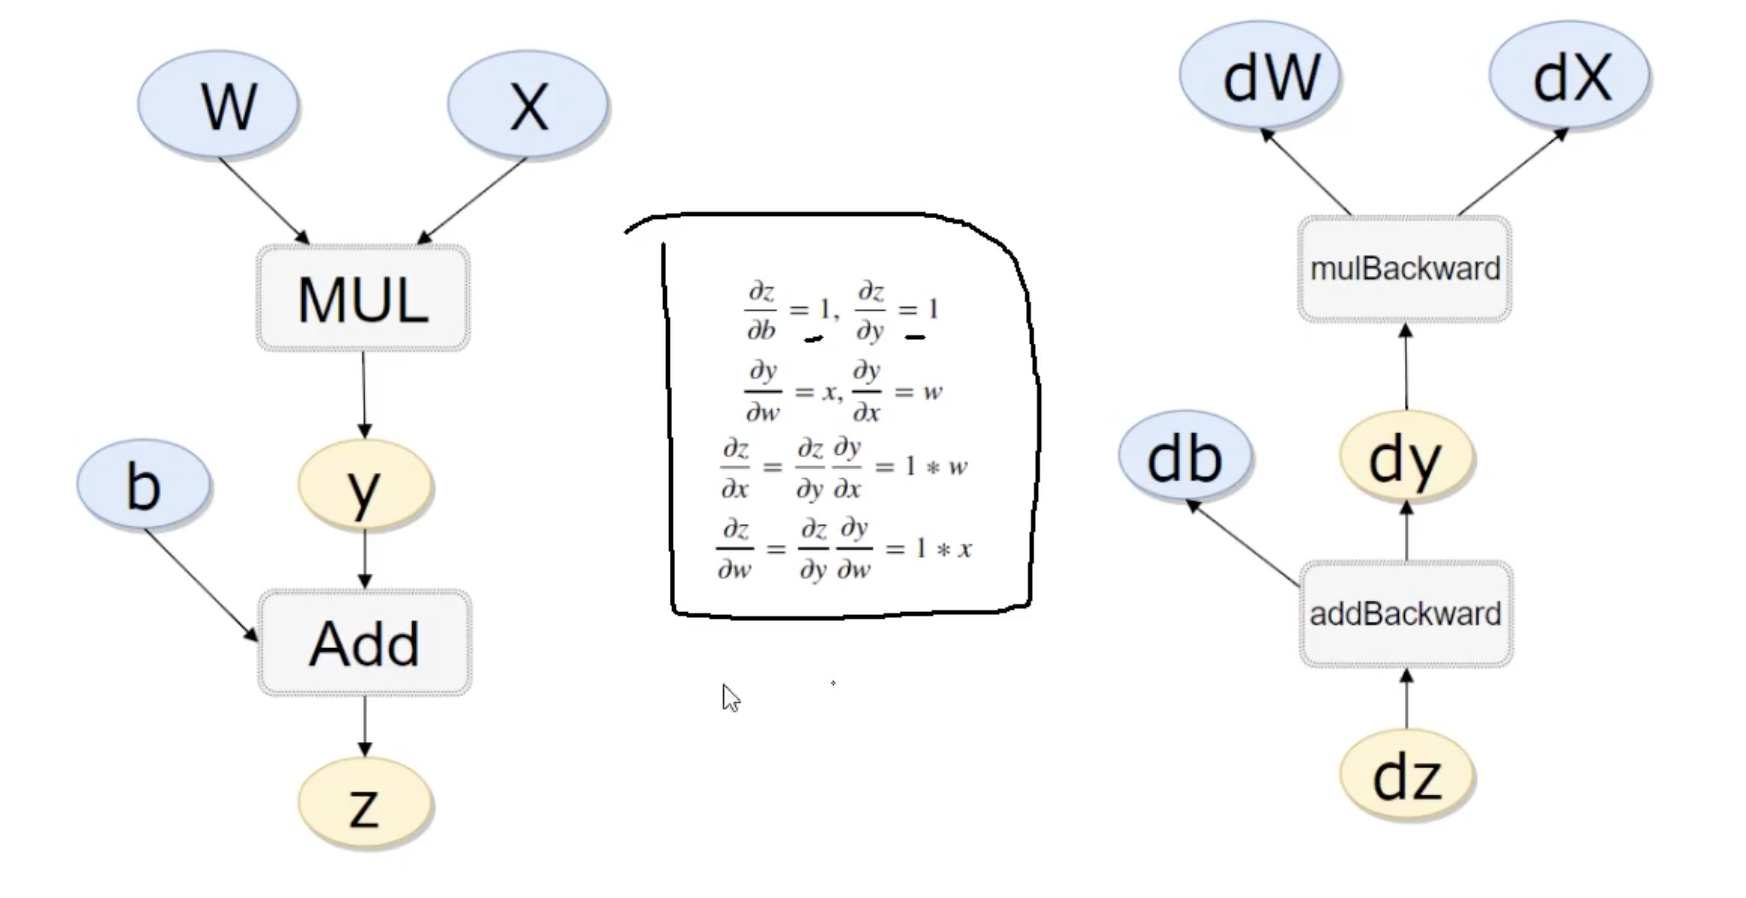

In [19]:
#计算流程
x = torch.rand(1)
b = torch.rand(1, requires_grad = True)
w = torch.rand(1, requires_grad = True)
y = w * x
z = y + b

In [20]:
x.is_leaf, w.is_leaf, b.is_leaf, y.is_leaf, z.is_leaf

(True, True, True, False, False)

In [27]:
z.backward(retain_graph = True) #如果不清空会累加起来

In [28]:
w.grad

tensor([0.1817])

In [29]:
x

tensor([0.1817])

In [30]:
b.grad

tensor([1.])

# 线性回归

构造一组输入数据X和其对应的标签y

In [31]:
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype = np.float32)
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [32]:
y_values = [2 * i + 1 for i in x_values]
y_train = np.array(y_values, dtype = np.float32)
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [33]:
import torch
import torch.nn as nn

# 线性回归模型
线性回归就是一个不加激活层的全连接层

In [36]:
class LinearRegressionModel(nn.Module):
    def __init__(self, intput_dim, output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out

In [37]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

指定好参数和损失函数

In [39]:
epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

训练模型

In [40]:
for epoch in range(epochs):
    epoch += 1
    #注意转行为tensor
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    #梯度在每一次迭代要清零
    optimizer.zero_grad()
    #前向传播
    outputs = model(inputs)
    #计算损失
    loss = criterion(outputs,labels)
    #反向传播
    loss.backward()
    #更新权重
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch{}, loss{}'.format(epoch,loss.item()))

epoch50, loss0.28040611743927
epoch100, loss0.159932941198349
epoch150, loss0.09121975302696228
epoch200, loss0.052028264850378036
epoch250, loss0.029675055295228958
epoch300, loss0.0169255118817091
epoch350, loss0.009653651155531406
epoch400, loss0.005506116896867752
epoch450, loss0.0031404553446918726
epoch500, loss0.0017912219045683742
epoch550, loss0.0010216361843049526
epoch600, loss0.0005827141576446593
epoch650, loss0.00033235448063351214
epoch700, loss0.00018956167332362384
epoch750, loss0.00010811493848450482
epoch800, loss6.166195817058906e-05
epoch850, loss3.517083314363845e-05
epoch900, loss2.005941314564552e-05
epoch950, loss1.144149609899614e-05
epoch1000, loss6.526715424115537e-06


# 测试模型预测结果

In [42]:
prediction = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
prediction

array([[ 0.9952479],
       [ 2.995932 ],
       [ 4.9966164],
       [ 6.9973006],
       [ 8.997985 ],
       [10.99867  ],
       [12.999353 ],
       [15.000037 ],
       [17.000723 ],
       [19.001408 ],
       [21.002092 ]], dtype=float32)

# 模型的保存与读取

In [43]:
torch.save(model.state_dict(),'model.pkl')

In [44]:
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

# 使用GPU进行训练
只需要将数据和模型传入到cuda里就可以了

In [ ]:
import torch
import torch.nn as nn
import numpy as np
class LinearRegressionModel(nn.Module):
    def __init__(self, intput_dim, output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

#指定为gpu
device = torch.devie("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

for epoch in range(epochs):
    epoch += 1
    #注意转行为tensor
    inputs = torch.from_numpy(x_train).to(d)
    labels = torch.from_numpy(y_train)
    #梯度在每一次迭代要清零
    optimizer.zero_grad()
    #前向传播
    outputs = model(inputs)
    #计算损失
    loss = criterion(outputs,labels)
    #反向传播
    loss.backward()
    #更新权重
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch{}, loss{}'.format(epoch,loss.item()))